# Results from CircuitQED
### Interpretation of the energies and coupling strenghts obtained for different couplings between 3-jj flux qubits using the program CircuitQED.ipynb
---

In [1]:
#Import libraries
import numpy as np
from matplotlib import pyplot as plt
import csv
np.set_printoptions( linewidth=1000 )

In [2]:
# This is to make all fonts latex in matplot lib
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
# Define the font size for each part of the plot:
SMALL_SIZE = 13
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=10)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)             # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

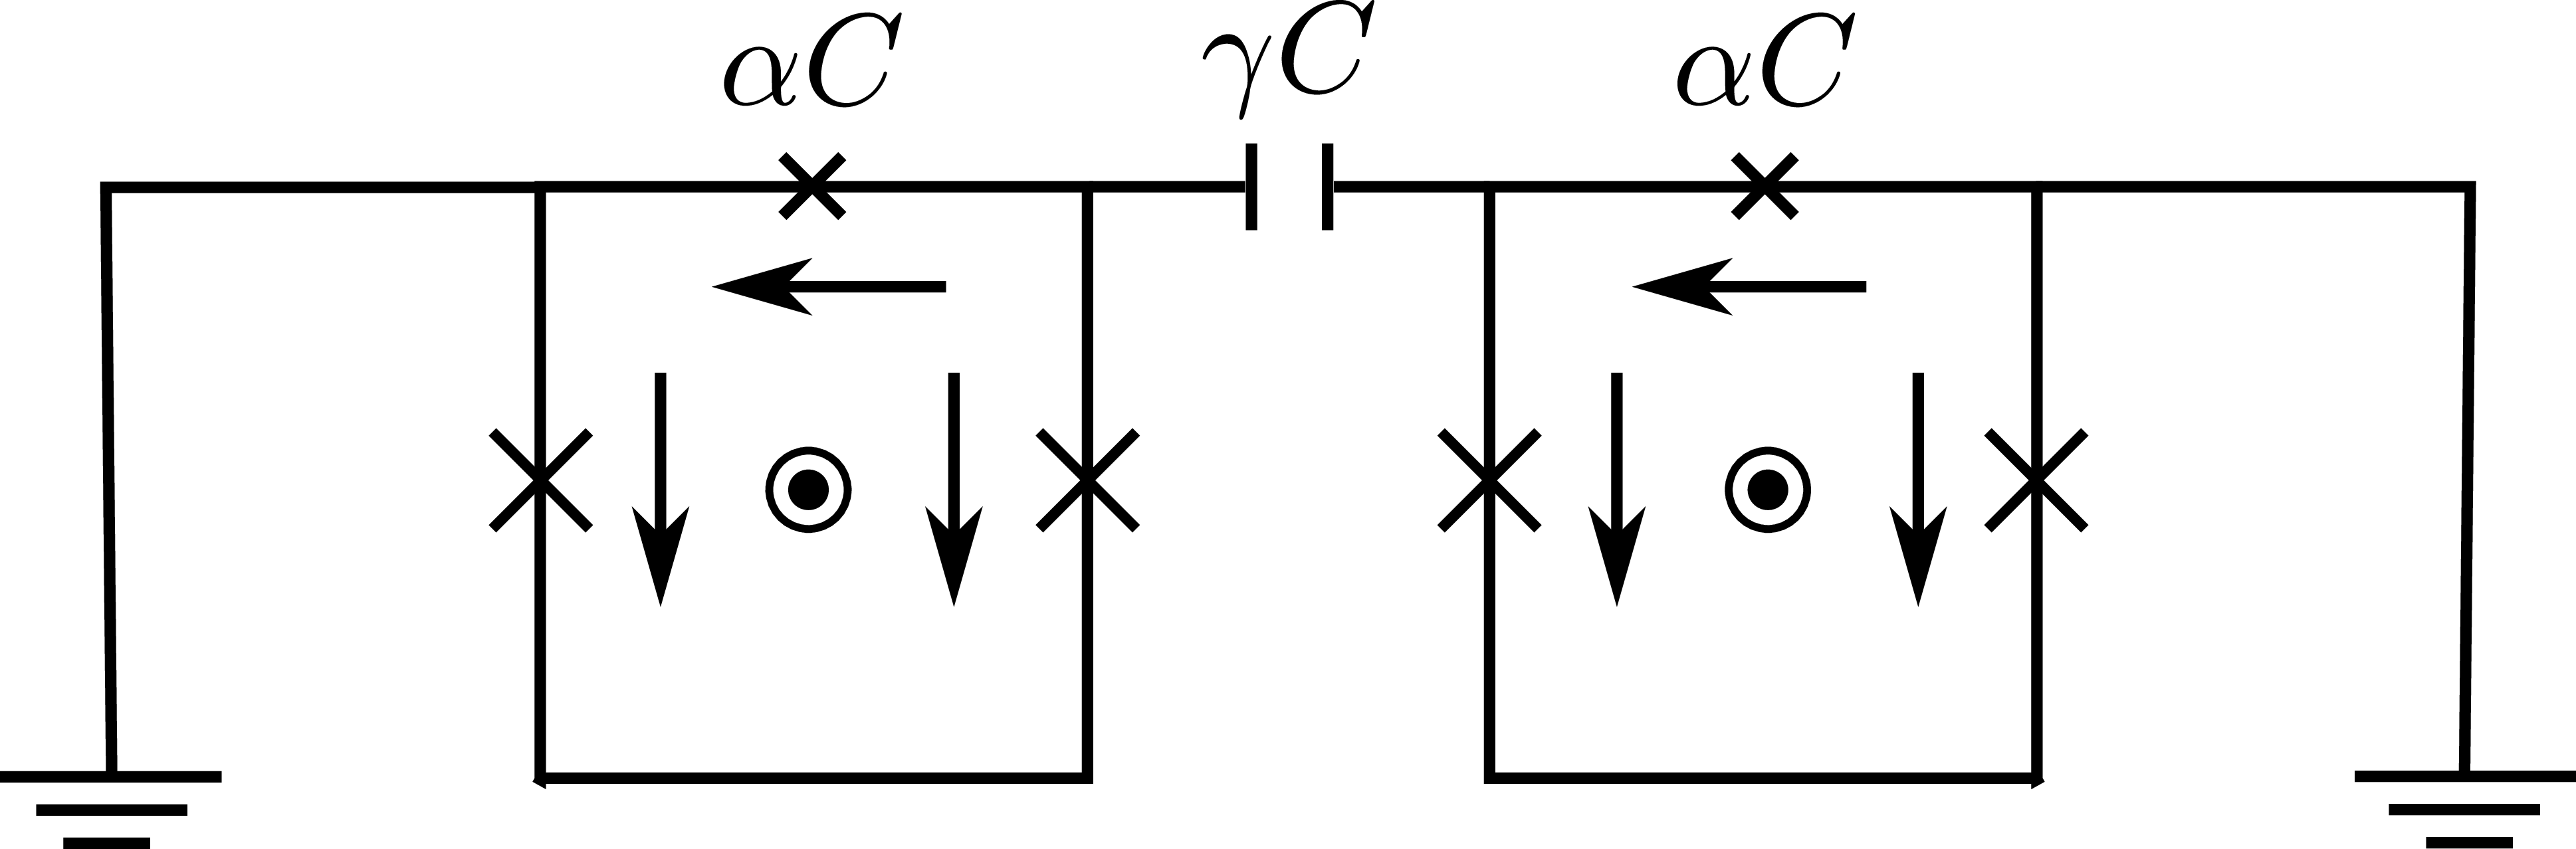

In [3]:
from IPython.display import Image
PATH = "./"
Image(filename = PATH + "Fig_coupled.png", width=500, height=500)

# Theory

We analyze capacitative coupling of two flux qubit as in previous figure. We use the harmonic theory where each of the qubit states is described by the harmonic ground state of its associated harmonic potential:

For the gap and coupling of two capacitatively coupled qubit, we have:
\begin{align}
\Delta = &2 e^{-\frac{\varphi_\star^2}{2\sigma^2}} \left[ \frac{\hbar^2}{ 8\sigma^2M_-}\left(1-\frac{\varphi^2_\star}{\sigma^2}\right)-E_J\left(2e^{-\frac{\sigma^2}{2}}-\alpha e^{-2\sigma^2}\right) \right].
\end{align}
\begin{align} 
 g=& \gamma\ \frac{2\varphi_\star^2 E_C}{\sigma^4(1+2\alpha)(1+2\alpha+4\gamma)} e^{-\frac{\varphi_\star^2}{\sigma^2}}
\end{align}
The spread of the wavefunctions taking into account the renormalization of the masses is:
\begin{align}
 \sigma^2= \sqrt{\frac{(1+2\alpha+2\gamma)\alpha}{(1+2\alpha+4\gamma)(1+2\alpha)(4\alpha^2-1)}}\sqrt{\frac{E_C}{E_J}}
\end{align}
Following functions computes the gap and the coupling using this formulas:

In [4]:
# Renormalized gap for two qubit coupled capacitatively as in previous
# figure. It depends on a, alpha, g the coupling and EJ EC.
def ggaph(a, g, Ej, Ec):
    phi_s = lambda x: np.arccos(1/(2*x))
    M = 1/(4*Ec)*(1+2*a)*(1+2*a+4*g)/(1+2*a+2*g)
    sigma2 = np.sqrt(Ec/Ej)*np.sqrt((1+2*a+2*g)*a /((1+2*a)*(1+2*a+4*g)*(4*a**2-1)))
    gap = -2*np.exp(-phi_s(a)**2/(2*sigma2)) * ( 1/(8*sigma2*M) 
                                                *(1-phi_s(a)**2/(2*sigma2))
                                                -Ej*(2*np.exp(-sigma2/2)-a*np.exp(-2*sigma2)) )
    return gap

In [5]:
# Coupling for two qubit coupled capacitatively as in previous
# figure. It depends on a, alpha, g the coupling and EJ EC.
def gcoup(a, g, Ej, Ec):
    phi_s = lambda x: np.arccos(1/(2*x))
    M = 1/(4*Ec)*(1+2*a)*(1+2*a+4*g)/(1+2*a+2*g)
    sigma2 = np.sqrt(Ec/Ej)*np.sqrt((1+2*a+2*g)*a /((1+2*a)*(1+2*a+4*g)*(4*a**2-1)))
    gc = (2*g * phi_s(a)**2)/((sigma2)**2*(1+2*a+4*g)*(1+2*a))*np.exp(-phi_s(a)**2/(sigma2))
    return gc

---
## Capacitive coupling 1, 2-qubits


<img src="CapacitiveCoupling1.png"
     alt="CapacitiveCoupling1"
     style=" width: 700px;"/>

The Lagrangian of this system is given by:
$$\mathcal{L}=\mathcal{L}_1+\mathcal{L}_2+g(\dot{\phi_1'}-\dot{\phi_2})^2$$
where $\mathcal{L}_1$ and $\mathcal{L}_2$ are the Lagrangians of the qubits uncoupled. 

This expression can be expanded into:
$$\mathcal{L}=\frac{C}{2}\left[\left(\dot{\phi_1}-\dot{\phi_0}\right)^2+\left(\dot{\phi_0}-\dot{\phi_2}\right)^2+\alpha\left(\dot{\phi_1}-\dot{\phi_2}\right)^2+\left(\dot{\phi_1'}-\dot{\phi_0'}\right)^2+\left(\dot{\phi_0'}-\dot{\phi_2'}\right)^2+\alpha\left(\dot{\phi_1'}-\dot{\phi_2'}\right)^2+\gamma\left(\dot{\phi_1'}-\dot{\phi_2}\right)^2\right]+E_J\cos\left(\frac{\phi_1-\phi_0}{\varphi_0}\right)+E_J\cos\left(\frac{\phi_0-\phi_2}{\varphi_0}\right)+\alpha E_J\cos\left(\frac{\phi_1-\phi_2-\Phi}{\varphi_0}\right)+E_J\cos\left(\frac{\phi_1'-\phi_0'}{\varphi_0}\right)+E_J\cos\left(\frac{\phi_0'-\phi_2'}{\varphi_0}\right)+\alpha E_J\cos\left(\frac{\phi_1'-\phi_2'-\Phi'}{\varphi_0}\right)$$

Hence, we can use the circuit class for solving this system's Hamiltonian. We'll take: $\phi_0'\rightarrow \phi_3$, $\phi_1'\rightarrow \phi_4$ and $\phi_2'\rightarrow \phi_5$.

Now, we are going to obtain the spectra of the system and the strenght of the coupling ($g$) for different parameter combinations (and check that the energy splitting between E1 and E2 matches $g$).

** Note that we will have to connect one of the nodes in each 3jj flux-qubit to the ground in order to solve the circuit.

- Ground in $\Phi_1$ and $\Phi_2'$, $s=2$.

# Scaling data:

Using the harmonic approximation as in the paper, we obtain that the coupling can be approximated as:
\begin{equation}\label{Eq:limitation}
 \frac{g}{\Delta} \sim  \frac{\gamma}{1+\gamma} \frac{1}{\Delta_a}
\end{equation}
This tells us that copuling will grow linearly for small $\gamma$ and then, it will saturate to a value proportional inversely proportional to the anharmonicity $1/\Delta_a$.

In order to plot several data in one plot, we would like to scale the linar part so that all coincide, approximately. That can be done using as a x coordinate $\gamma/\Delta_a.$ However, in the theoretical assumptions $\gamma$ is equal to the ratio between the coupling and qubit capacitance. That is, for the 3 Josephson junctions qubit, we will have to plot as a function of $\gamma/(1+2\alpha+2\beta).$ 

In [6]:
# To store the data for the coupling divided by the gap, so that we can plot all together
# after running all the cases:
gdg = 20*[None]
x_gdg = 20*[None]
par = 20*[None]
anhar = 20*[None]
ilin = 1000

# Given the values of gamma, gap and energy between first
# fourth level, it outputs an array which is a function of previous data and would be used
# as x coordinate to scale the coupling g as a function of x.
def give_x(gamma, E_g, E_ex, beta=0, alpha=0):
    x = gamma/(1+2*alpha+2*beta) *E_g/(E_ex)
    return x
    
    

# Three JJ qubit

In [7]:
## Define a function to extract the data from the txt. 
def txt_to_npz_3JJ(EJ, EC, alpha, st, nmax):
    lines = []                             # Declare an empty list to store lines.
    with open ('r'+str(EJ/EC)+'EJ'+str(EJ)+'alpha'+str(alpha)+'st'+str(st)+'nmax'+str(nmax)+'.dat', 'rt') as txt: # Open .txt for reading text data.
        for line in txt:                # For each line, stored as line.
            lines.append(line)
    
    #Extract the data from lines.
    gamma=lines[1].split() #remember that the first line are the coments so gamma=second line.
    for i in range(len(gamma)): 
        gamma[i]=complex(gamma[i])
    E=np.zeros((len(gamma),7),dtype=complex) #Matrix to store the energies values.
    for j in range(7):
        E_aux= lines[j+2].split() #rows from 2 to 8 give the energies.
        for i in range(len(E_aux)):
            E_aux[i]=complex(E_aux[i])
        E[:,j]=E_aux
        
    P=np.zeros((4,4,len(gamma)),dtype=complex) #Matrix to store the P_ij values.
    P_aux=lines[9].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[0,0]=P_aux
    
    P_aux=lines[10].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[1,1]=P_aux
    
    P_aux=lines[11].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[2,2]=P_aux
    
    P_aux=lines[12].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[3,3]=P_aux
    
    P_aux=lines[13].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[0,1]=P_aux
    
    P_aux=lines[14].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[1,0]=P_aux
    
    P_aux=lines[15].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[0,2]=P_aux
    
    P_aux=lines[16].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[2,0]=P_aux
    
    P_aux=lines[17].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[0,3]=P_aux
    
    P_aux=lines[18].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[3,0]=P_aux
    
    P_aux=lines[19].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[1,2]=P_aux
    
    P_aux=lines[20].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[2,1]=P_aux
    
    P_aux=lines[21].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[1,3]=P_aux
    
    P_aux=lines[22].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[3,1]=P_aux
    
    P_aux=lines[23].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[2,3]=P_aux
    
    P_aux=lines[24].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[3,2]=P_aux
    
    return gamma, E, P

In [8]:
#Parameters.
alpha=0.7
EJ=1
EC=1/80
nmax=10
st=2

#Charge results.
γ, E, P = txt_to_npz_3JJ(EJ, EC, alpha, st, nmax)

E=np.real_if_close(E,10)
P=np.real_if_close(np.round(P,13),10)
γ=np.real_if_close(γ)

Text(0, 0.5, '$J_{ij}^{int}/\\Delta_1$')

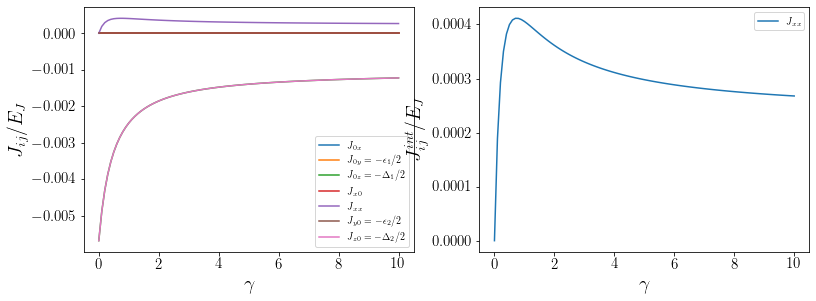

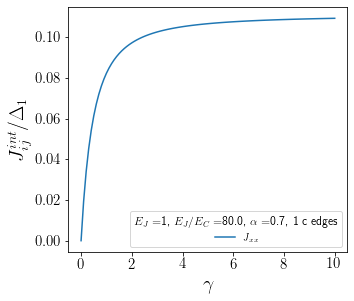

In [9]:
# Plot the results for the qubit Hamiltonian, showing the strength of the coupling.
fig,(ax1, ax2) =plt.subplots(ncols=2, nrows=1,figsize=(13, 4.5))
labels = [['$J_{00}$', '$J_{0x}$','$J_{0y}=-\epsilon_1/2$','$J_{0z}=-\Delta_1/2$'],['$J_{x0}$', '$J_{xx}$','$J_{xy}$','$J_{xz}$'],['$J_{y0}=-\epsilon_2/2$', '$J_{yx}$','$J_{yy}$','$J_{yz}$'], ['$J_{z0}=-\Delta_2/2$', '$J_{zx}$','$J_{zy}$','$J_{zz}$']] # useful to print the legend.
for l in range(4):
    for n in range(4):
        if n!=0 or l!=0:
            if np.any(P[l,n,:]!=0):
                label=labels[l][n]
                ax1.plot(γ,P[l,n,:],label = label)

ax1.legend()
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$J_{ij}/E_J$')

for k in range(1,4):
    if np.any(P[k,k,:]!=0):
        label=labels[k][k]
        ax2.plot(γ,P[k,k,:],label = label)
ax2.legend()
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$J_{ij}^{int}/E_J$')

#Ratio interaction-qubit GAP.
fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
for m in range(1,4):
    if np.any(P[m,m,:]!=0):
        label=labels[m][m]
        ax3.plot(γ,np.abs(P[m,m,:]/(P[0,3,:]*2)),label = label)
ax3.legend(title="$ E_J=$"+str(EJ)+", $ E_J/E_C=$"+str(EJ/EC)+", $\\alpha=$"+str(alpha)+", 1 c edges", title_fontsize=12)
# ax1.legend(fontsize=14, title="$ E_J/E_C=$"+str(Ej)+", $\\)
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')

Text(0, 0.5, '$E/E_J$')

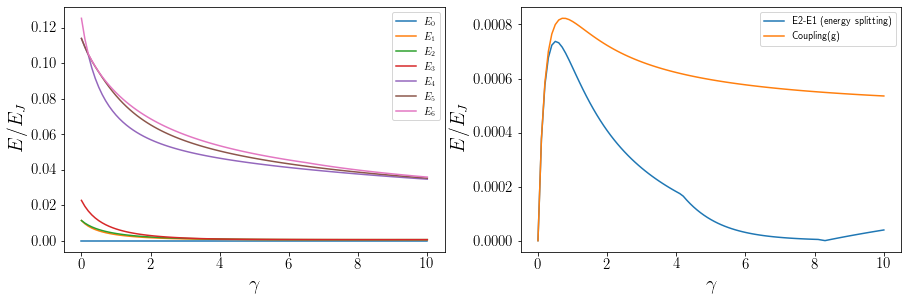

In [10]:
#Plot the result for the energy of then system and the comparision between the level splitting and the strength of the coupling.
fig, (ax1,ax2)=plt.subplots(ncols=2, nrows=1, figsize=(15, 4.5))
ax1.plot(γ, (E-E[:,[0]*7]), label='Inline label')
ax1.legend(('$E_0$', '$E_1$','$E_2$','$E_3$','$E_4$','$E_5$', '$E_6$'))
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$E/E_J$')
ax2.plot(γ, E[:,2]-E[:,1], γ, 2*np.abs(P[1,1,:]), label='Inline  label')
ax2.legend(('E2-E1 (energy splitting)', 'Coupling(g)'))
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$E/E_J$')

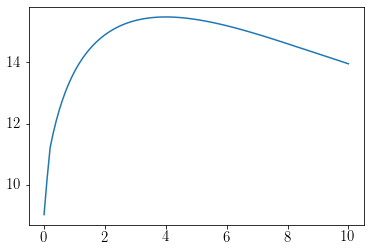

In [11]:
#Plot the result for the energy of then system and the comparision between the level splitting and the strength of the coupling.
fig, (ax1)=plt.subplots()
ax1.plot(γ, (E[:,4]-E[:,1])/(-P[0,3,:]*2), label='Inline label')


No handles with labels found to put in legend.


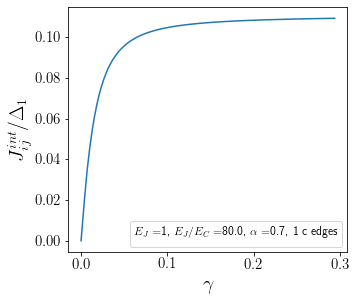

In [12]:
xpinta = give_x(γ[0:ilin],np.abs(P[0,3,0:ilin])*2,E[0:ilin,4]-E[0:ilin,0], alpha = alpha)
ypinta = np.abs(P[1,1,0:ilin]/(P[0,3,0:ilin]*2))

#Coupling/gap as a function of anisotropy
fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
ax3.plot(xpinta,ypinta)
ax3.legend(title="$ E_J=$"+str(EJ)+", $ E_J/E_C=$"+str(EJ/EC)+", $\\alpha=$"+str(alpha)+", 1 c edges", title_fontsize=12)
# ax1.legend(fontsize=14, title="$ E_J/E_C=$"+str(Ej)+", $\\)
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')

gdg[0] = ypinta
x_gdg[0] = xpinta
par[0] = [EJ,EC,alpha]
anhar[0] = [γ[0:ilin],(E[0:ilin,4]-E[0:ilin,0])/np.abs(P[0,3,0:ilin]*2)]

(0.0, 5.0)

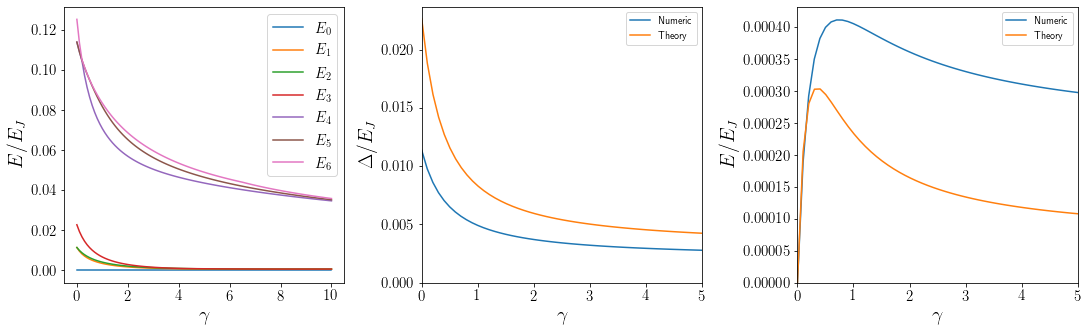

In [13]:
xx = np.linspace(0.,10,100)
yh = np.array([ggaph(alpha, x, EJ, EC) for x in xx]) 
ygh = np.array([gcoup(alpha, x, EJ, EC) for x in xx]) 
# Comparation of numerical and theoretical results:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3, nrows=1, figsize=(15, 4.5), constrained_layout=True)
# fig.suptitle("Parameters: $ E_J/E_C=$"+str(EJ/EC)+", $\\alpha=$"+str(alpha))

ax1.plot(γ, E-E[:,[0]*7], label='Inline label')
ax1.legend(('$E_0$', '$E_1$','$E_2$','$E_3$','$E_4$','$E_5$', '$E_6$'),fontsize=15)
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$E/E_J$')

# --------------------

ax2.plot(γ,  2*np.abs(P[0,3,:]), xx, yh/EJ)
ax2.legend(('Numeric','Theory' ))
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$\Delta/E_J$')
ax2.set_ylim(ymin=0)
ax2.set_xlim(xmin=0, xmax= 5)
# -----------------------------

ax3.plot(γ,P[1,1,:], xx, ygh )
ax3.legend(('Numeric', 'Theory'))
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$E/E_J$')
ax3.set_ylim(ymin=0)
ax3.set_xlim(xmin=0,xmax=5)

# plt.savefig("coupling_EJ.pdf",bbox_inches='tight')

In [14]:
#Parameters.
alpha=0.7
EJ=1
EC=1/50
nmax=10
st=2

#Charge results.
γ, E, P = txt_to_npz_3JJ(EJ, EC, alpha, st, nmax)

E=np.real_if_close(E,10)
P=np.real_if_close(np.round(P,10),10)
γ=np.real_if_close(γ)

Text(0, 0.5, '$J_{ij}^{int}/\\Delta_1$')

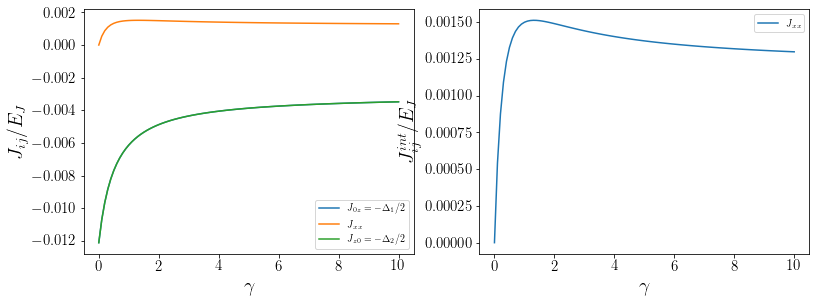

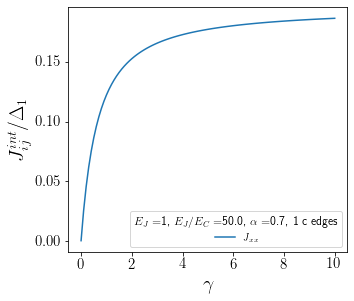

In [15]:
# Plot the results for the qubit Hamiltonian, showing the strength of the coupling.
fig,(ax1, ax2) =plt.subplots(ncols=2, nrows=1,figsize=(13, 4.5))
labels = [['$J_{00}$', '$J_{0x}$','$J_{0y}=-\epsilon_1/2$','$J_{0z}=-\Delta_1/2$'],['$J_{x0}$', '$J_{xx}$','$J_{xy}$','$J_{xz}$'],['$J_{y0}=-\epsilon_2/2$', '$J_{yx}$','$J_{yy}$','$J_{yz}$'], ['$J_{z0}=-\Delta_2/2$', '$J_{zx}$','$J_{zy}$','$J_{zz}$']] # useful to print the legend.
for l in range(4):
    for n in range(4):
        if n!=0 or l!=0:
            if np.any(P[l,n,:]!=0):
                label=labels[l][n]
                ax1.plot(γ,P[l,n,:],label = label)

ax1.legend()
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$J_{ij}/E_J$')

for k in range(1,4):
    if np.any(P[k,k,:]!=0):
        label=labels[k][k]
        ax2.plot(γ,P[k,k,:],label = label)
ax2.legend()
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$J_{ij}^{int}/E_J$')

#Ratio interaction-qubit GAP.
fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
for m in range(1,4):
    if np.any(P[m,m,:]!=0):
        label=labels[m][m]
        ax3.plot(γ,np.abs(P[m,m,:]/(P[0,3,:]*2)),label = label)
ax3.legend(title="$ E_J=$"+str(EJ)+", $ E_J/E_C=$"+str(EJ/EC)+", $\\alpha=$"+str(alpha)+", 1 c edges", title_fontsize=12)
# ax1.legend(fontsize=14, title="$ E_J/E_C=$"+str(Ej)+", $\\)
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')
# plt.tight_layout()
# plt.savefig('coupling.pdf')

Text(0, 0.5, '$E/E_J$')

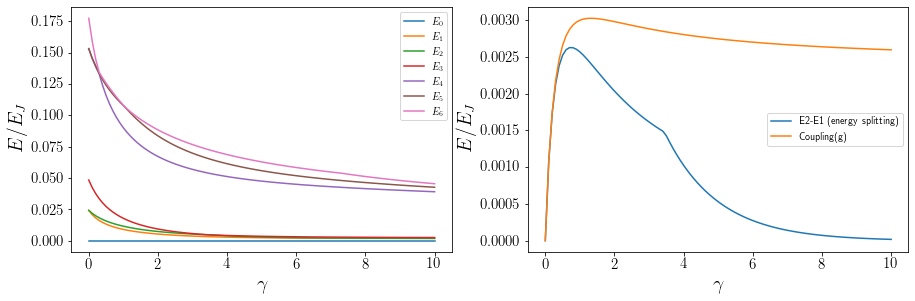

In [16]:
#Plot the result for the energy of then system and the comparision between the level splitting and the strength of the coupling.
fig, (ax1,ax2)=plt.subplots(ncols=2, nrows=1, figsize=(15, 4.5))
ax1.plot(γ, E-E[:,[0]*7], label='Inline label')
ax1.legend(('$E_0$', '$E_1$','$E_2$','$E_3$','$E_4$','$E_5$', '$E_6$'))
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$E/E_J$')
ax2.plot(γ, E[:,2]-E[:,1], γ, 2*np.abs(P[1,1,:]), label='Inline  label')
ax2.legend(('E2-E1 (energy splitting)', 'Coupling(g)'))
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$E/E_J$')

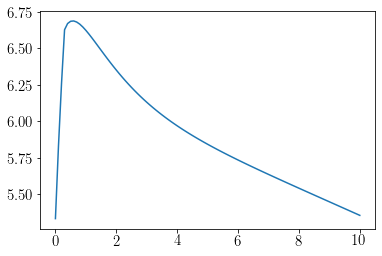

In [17]:
#Plot the result for the energy of then system and the comparision between the level splitting and the strength of the coupling.
fig, (ax1)=plt.subplots()
ax1.plot(γ, (E[:,4]-E[:,1])/(-P[0,3,:]*2), label='Inline label')


No handles with labels found to put in legend.


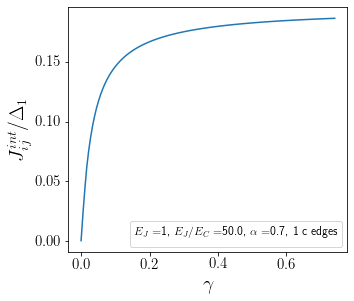

In [18]:
xpinta = give_x(γ[0:ilin],np.abs(P[0,3,0:ilin])*2,E[0:ilin,4]-E[0:ilin,0], alpha = alpha)
ypinta = np.abs(P[1,1,0:ilin]/(P[0,3,0:ilin]*2))

#Coupling/gap as a function of anharmonicity
fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
ax3.plot(xpinta,ypinta)
ax3.legend(title="$ E_J=$"+str(EJ)+", $ E_J/E_C=$"+str(EJ/EC)+", $\\alpha=$"+str(alpha)+", 1 c edges", title_fontsize=12)
# ax1.legend(fontsize=14, title="$ E_J/E_C=$"+str(Ej)+", $\\)
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')

gdg[1] = ypinta
x_gdg[1] = xpinta
par[1] = [EJ,EC,alpha]
anhar[1] = [γ[0:ilin],(E[0:ilin,4]-E[0:ilin,0])/np.abs(P[0,3,0:ilin]*2)]

(0.0, 5.0)

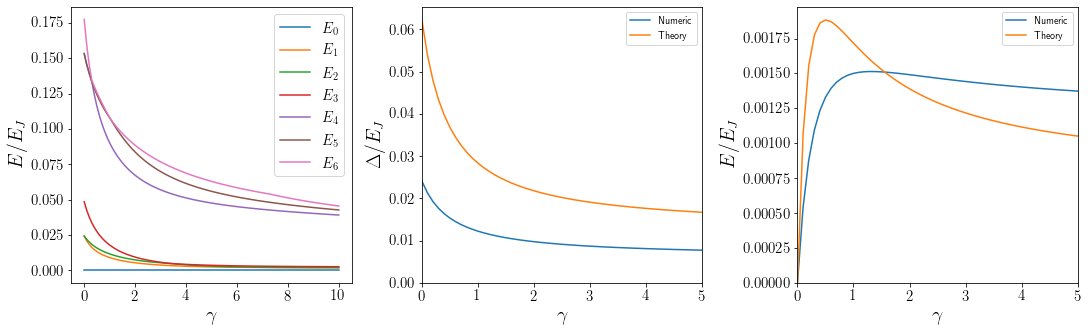

In [19]:
xx = np.linspace(0.,10,100)
yh = np.array([ggaph(alpha, x, EJ, EC) for x in xx]) 
ygh = np.array([gcoup(alpha, x, EJ, EC) for x in xx]) 
# Comparation of numerical and theoretical results:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3, nrows=1, figsize=(15, 4.5), constrained_layout=True)
# fig.suptitle("Parameters: $ E_J/E_C=$"+str(EJ/EC)+", $\\alpha=$"+str(alpha))

ax1.plot(γ, E-E[:,[0]*7], label='Inline label')
ax1.legend(('$E_0$', '$E_1$','$E_2$','$E_3$','$E_4$','$E_5$', '$E_6$'),fontsize=15)
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$E/E_J$')

# --------------------

ax2.plot(γ,  2*np.abs(P[0,3,:]), xx, yh/EJ)
ax2.legend(('Numeric','Theory' ))
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$\Delta/E_J$')
ax2.set_ylim(ymin=0)
ax2.set_xlim(xmin=0, xmax= 5)
# -----------------------------

ax3.plot(γ,P[1,1,:], xx, ygh )
ax3.legend(('Numeric', 'Theory'))
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$E/E_J$')
ax3.set_ylim(ymin=0)
ax3.set_xlim(xmin=0,xmax=5)

# plt.savefig("coupling_EJ.pdf",bbox_inches='tight')

# Paper Fig 3:

The parameters are $E_J/E_C= 50$ and $\alpha=0.7$

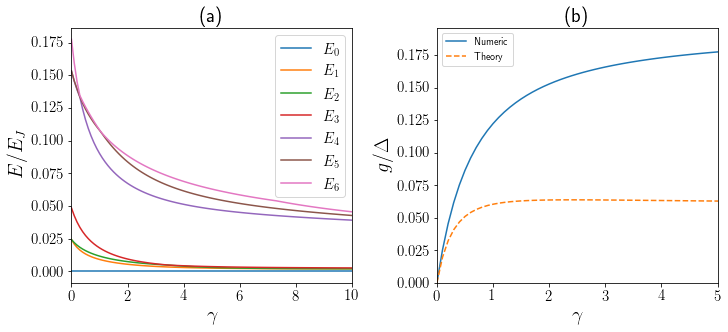

In [20]:
xx = np.linspace(0.,10,100)
yh = np.array([ggaph(alpha, x, EJ, EC) for x in xx]) 
ygh = np.array([gcoup(alpha, x, EJ, EC) for x in xx]) 
# Comparation of numerical and theoretical results:
fig, (ax1,ax3)=plt.subplots(ncols=2, nrows=1, figsize=(10, 4.5), constrained_layout=True)
# fig.suptitle("Parameters: $ E_J/E_C=$"+str(EJ/EC)+", $\\alpha=$"+str(alpha))

ax1.set_title('(a)',fontsize= 20)
ax1.plot(γ, E-E[:,[0]*7], label='Inline label')
ax1.set_xlim(xmin=0,xmax=10)
ax1.legend(('$E_0$', '$E_1$','$E_2$','$E_3$','$E_4$','$E_5$', '$E_6$'),fontsize=15)
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$E/E_J$')



ax3.set_title('(b)',fontsize= 20)
ax3.plot(γ,P[1,1,:]/( 2*np.abs(P[0,3,:])),"-", xx, ygh/yh,"--" )
ax3.legend(('Numeric', 'Theory'))
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$g/\Delta$')
ax3.set_ylim(ymin=0)
ax3.set_xlim(xmin=0,xmax=5)

plt.savefig("Fig3.pdf",bbox_inches='tight')

In [21]:
#Parameters.
alpha=0.8
EJ=1
EC=1/80
nmax=10
st=2

#Charge results.
γ, E, P = txt_to_npz_3JJ(EJ, EC, alpha, st, nmax)

E=np.real_if_close(E,10)
P=np.real_if_close(np.round(P,10),10)
γ=np.real_if_close(γ)

Text(0, 0.5, '$J_{ij}^{int}/\\Delta_1$')

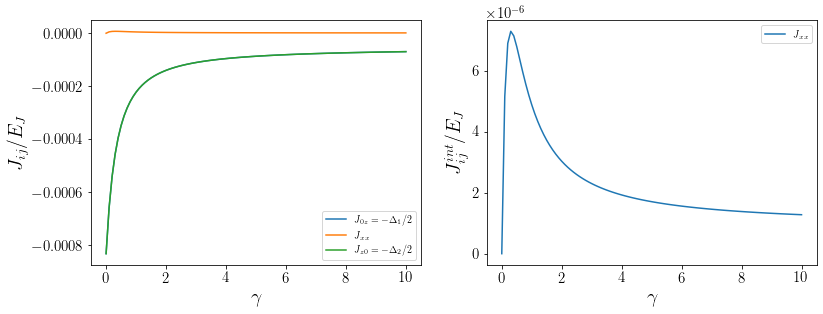

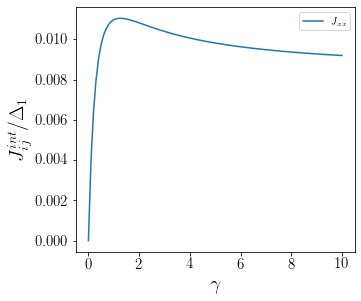

In [22]:
# Plot the results for the qubit Hamiltonian, showing the strength of the coupling.
fig,(ax1, ax2) =plt.subplots(ncols=2, nrows=1,figsize=(13, 4.5))
labels = [['$J_{00}$', '$J_{0x}$','$J_{0y}=-\epsilon_1/2$','$J_{0z}=-\Delta_1/2$'],['$J_{x0}$', '$J_{xx}$','$J_{xy}$','$J_{xz}$'],['$J_{y0}=-\epsilon_2/2$', '$J_{yx}$','$J_{yy}$','$J_{yz}$'], ['$J_{z0}=-\Delta_2/2$', '$J_{zx}$','$J_{zy}$','$J_{zz}$']] # useful to print the legend.
for l in range(4):
    for n in range(4):
        if n!=0 or l!=0:
            if np.any(P[l,n,:]!=0):
                label=labels[l][n]
                ax1.plot(γ,P[l,n,:],label = label)

ax1.legend()
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$J_{ij}/E_J$')

for k in range(1,4):
    if np.any(P[k,k,:]!=0):
        label=labels[k][k]
        ax2.plot(γ,P[k,k,:],label = label)
ax2.legend()
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$J_{ij}^{int}/E_J$')

#Ratio interaction-qubit GAP.
fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
for m in range(1,4):
    if np.any(P[m,m,:]!=0):
        label=labels[m][m]
        ax3.plot(γ,np.abs(P[m,m,:]/(P[0,3,:]*2)),label = label)
ax3.legend()
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')

Text(0, 0.5, '$E/E_J$')

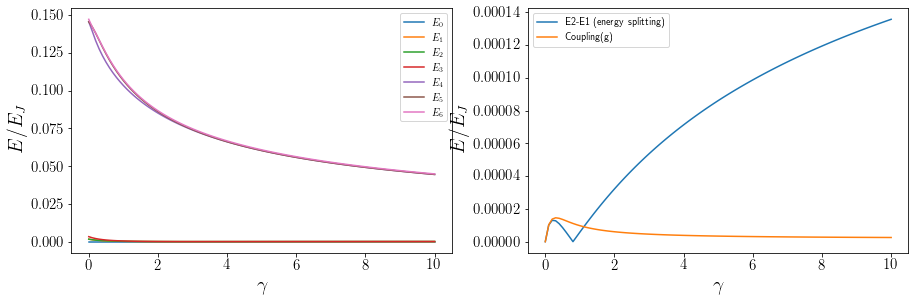

In [23]:
#Plot the result for the energy of then system and the comparision between the level splitting and the strength of the coupling.
fig, (ax1,ax2)=plt.subplots(ncols=2, nrows=1, figsize=(15, 4.5))
ax1.plot(γ, E-E[:,[0]*7], label='Inline label')
ax1.legend(('$E_0$', '$E_1$','$E_2$','$E_3$','$E_4$','$E_5$', '$E_6$'))
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$E/E_J$')
ax2.plot(γ, E[:,2]-E[:,1], γ, 2*np.abs(P[1,1,:]), label='Inline  label')
ax2.legend(('E2-E1 (energy splitting)', 'Coupling(g)'))
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$E/E_J$')

In [24]:
# xpinta = give_x(γ[0:ilin],np.abs(P[0,3,0:ilin])*2,E[0:ilin,4]-E[0:ilin,0], alpha = alpha)
# ypinta = np.abs(P[1,1,0:ilin]/(P[0,3,0:ilin]*2))

# #Coupling/gap as a function of anisotropy
# fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
# ax3.plot(xpinta,ypinta)
# ax3.legend(title="$ E_J=$"+str(EJ)+", $ E_J/E_C=$"+str(EJ/EC)+", $\\alpha=$"+str(alpha)+", 1 c edges", title_fontsize=12)
# # ax1.legend(fontsize=14, title="$ E_J/E_C=$"+str(Ej)+", $\\)
# ax3.set_xlabel('$\gamma$')
# ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')

# gdg[2] = ypinta
# x_gdg[2] = xpinta
# par[2] = [EJ,EC,alpha]
# anhar[2] =  [γ[0:ilin],(E[0:ilin,4]-E[0:ilin,0])/np.abs(P[0,3,0:ilin]*2)]

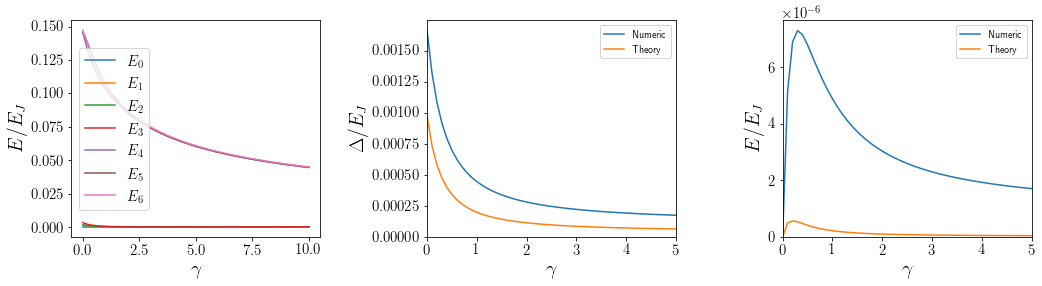

In [25]:
xx = np.linspace(0.,10,100)
yh = np.array([ggaph(alpha, x, EJ, EC) for x in xx]) 
ygh = np.array([gcoup(alpha, x, EJ, EC) for x in xx]) 
# Comparation of numerical and theoretical results:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3, nrows=1, figsize=(15, 4.5))

ax1.plot(γ, E-E[:,[0]*7], label='Inline label')
ax1.legend(('$E_0$', '$E_1$','$E_2$','$E_3$','$E_4$','$E_5$', '$E_6$'),fontsize=15)
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$E/E_J$')

# --------------------

ax2.plot(γ,  2*np.abs(P[0,3,:]), xx, yh/EJ)
ax2.legend(('Numeric','Theory' ))
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$\Delta/E_J$')
ax2.set_ylim(ymin=0)
ax2.set_xlim(xmin=0, xmax= 5)
# -----------------------------

ax3.plot(γ,P[1,1,:], xx, ygh )
ax3.legend(('Numeric', 'Theory'))
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$E/E_J$')
ax3.set_ylim(ymin=0)
ax3.set_xlim(xmin=0,xmax=5)

fig.tight_layout(pad=2.0)

In [26]:
#Parameters.
alpha=0.6
EJ=1
EC=1/50
nmax=10
st=2

#Charge results.
γ, E, P = txt_to_npz_3JJ(EJ, EC, alpha, st, nmax)

E=np.real_if_close(E,10)
P=np.real_if_close(np.round(P,10),10)
γ=np.real_if_close(γ)

Text(0, 0.5, '$J_{ij}^{int}/\\Delta_1$')

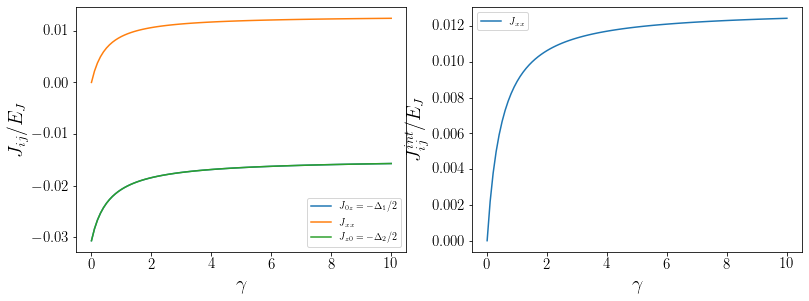

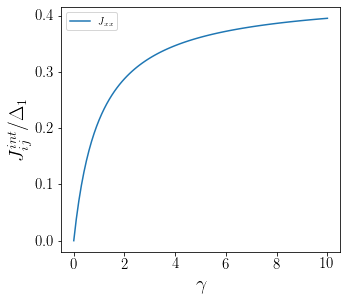

In [27]:
# Plot the results for the qubit Hamiltonian, showing the strength of the coupling.
fig,(ax1, ax2) =plt.subplots(ncols=2, nrows=1,figsize=(13, 4.5))
labels = [['$J_{00}$', '$J_{0x}$','$J_{0y}=-\epsilon_1/2$','$J_{0z}=-\Delta_1/2$'],['$J_{x0}$', '$J_{xx}$','$J_{xy}$','$J_{xz}$'],['$J_{y0}=-\epsilon_2/2$', '$J_{yx}$','$J_{yy}$','$J_{yz}$'], ['$J_{z0}=-\Delta_2/2$', '$J_{zx}$','$J_{zy}$','$J_{zz}$']] # useful to print the legend.
for l in range(4):
    for n in range(4):
        if n!=0 or l!=0:
            if np.any(P[l,n,:]!=0):
                label=labels[l][n]
                ax1.plot(γ,P[l,n,:],label = label)

ax1.legend()
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$J_{ij}/E_J$')

for k in range(1,4):
    if np.any(P[k,k,:]!=0):
        label=labels[k][k]
        ax2.plot(γ,P[k,k,:],label = label)
ax2.legend()
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$J_{ij}^{int}/E_J$')

#Ratio interaction-qubit GAP.
fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
for m in range(1,4):
    if np.any(P[m,m,:]!=0):
        label=labels[m][m]
        ax3.plot(γ,np.abs(P[m,m,:]/(P[0,3,:]*2)),label = label)
ax3.legend()
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')

Text(0, 0.5, '$E/E_J$')

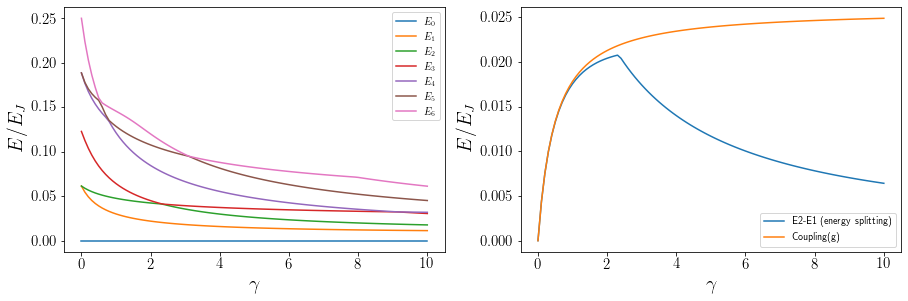

In [28]:
#Plot the result for the energy of then system and the comparision between the level splitting and the strength of the coupling.
fig, (ax1,ax2)=plt.subplots(ncols=2, nrows=1, figsize=(15, 4.5))
ax1.plot(γ, E-E[:,[0]*7], label='Inline label')
ax1.legend(('$E_0$', '$E_1$','$E_2$','$E_3$','$E_4$','$E_5$', '$E_6$'))
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$E/E_J$')
ax2.plot(γ, E[:,2]-E[:,1], γ, 2*np.abs(P[1,1,:]), label='Inline  label')
ax2.legend(('E2-E1 (energy splitting)', 'Coupling(g)'))
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$E/E_J$')

No handles with labels found to put in legend.


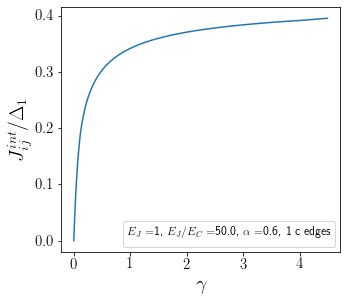

In [29]:
xpinta = give_x(γ[0:ilin],np.abs(P[0,3,0:ilin])*2,E[0:ilin,4]-E[0:ilin,0], alpha = alpha)
ypinta = np.abs(P[1,1,0:ilin]/(P[0,3,0:ilin]*2))

#Coupling/gap as a function of anisotropy
fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
ax3.plot(xpinta,ypinta)
ax3.legend(title="$ E_J=$"+str(EJ)+", $ E_J/E_C=$"+str(EJ/EC)+", $\\alpha=$"+str(alpha)+", 1 c edges", title_fontsize=12)
# ax1.legend(fontsize=14, title="$ E_J/E_C=$"+str(Ej)+", $\\)
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')

gdg[3] = ypinta
x_gdg[3] = xpinta
par[3] = [EJ,EC,alpha]
anhar[3] = [γ[0:ilin],(E[0:ilin,4]-E[0:ilin,0])/np.abs(P[0,3,0:ilin]*2)]

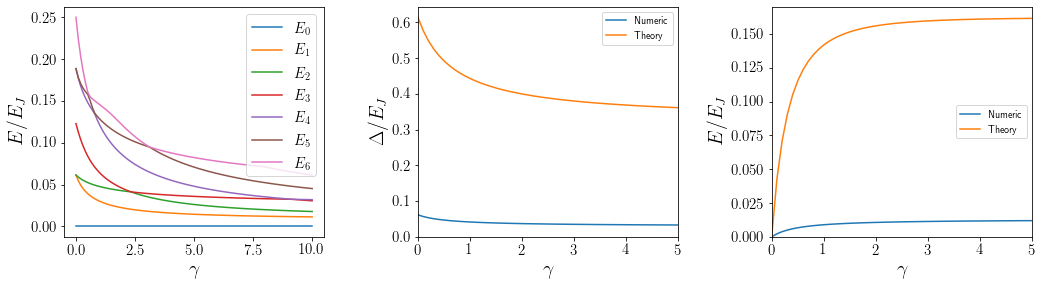

In [30]:
xx = np.linspace(0.,10,100)
yh = np.array([ggaph(alpha, x, EJ, EC) for x in xx]) 
ygh = np.array([gcoup(alpha, x, EJ, EC) for x in xx]) 
# Comparation of numerical and theoretical results:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3, nrows=1, figsize=(15, 4.5))

ax1.plot(γ, E-E[:,[0]*7], label='Inline label')
ax1.legend(('$E_0$', '$E_1$','$E_2$','$E_3$','$E_4$','$E_5$', '$E_6$'),fontsize=15)
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$E/E_J$')

# --------------------

ax2.plot(γ,  2*np.abs(P[0,3,:]), xx, yh/EJ)
ax2.legend(('Numeric','Theory' ))
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$\Delta/E_J$')
ax2.set_ylim(ymin=0)
ax2.set_xlim(xmin=0, xmax= 5)
# -----------------------------

ax3.plot(γ,P[1,1,:], xx, ygh )
ax3.legend(('Numeric', 'Theory'))
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$E/E_J$')
ax3.set_ylim(ymin=0)
ax3.set_xlim(xmin=0,xmax=5)

fig.tight_layout(pad=2.0)

In [31]:
#Parameters.
alpha=0.55
EJ=1
EC=1/50
nmax=10
st=2

#Charge results.
γ, E, P = txt_to_npz_3JJ(EJ, EC, alpha, st, nmax)

E=np.real_if_close(E,10)
P=np.real_if_close(np.round(P,10),10)
γ=np.real_if_close(γ)

Text(0, 0.5, '$J_{ij}^{int}/\\Delta_1$')

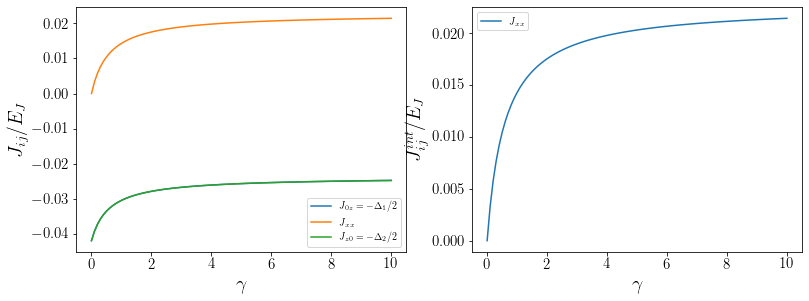

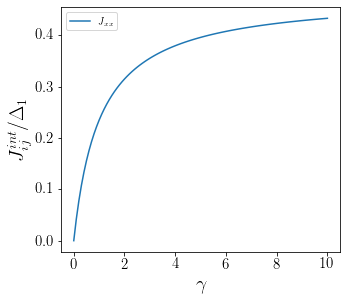

In [32]:
# Plot the results for the qubit Hamiltonian, showing the strength of the coupling.
fig,(ax1, ax2) =plt.subplots(ncols=2, nrows=1,figsize=(13, 4.5))
labels = [['$J_{00}$', '$J_{0x}$','$J_{0y}=-\epsilon_1/2$','$J_{0z}=-\Delta_1/2$'],['$J_{x0}$', '$J_{xx}$','$J_{xy}$','$J_{xz}$'],['$J_{y0}=-\epsilon_2/2$', '$J_{yx}$','$J_{yy}$','$J_{yz}$'], ['$J_{z0}=-\Delta_2/2$', '$J_{zx}$','$J_{zy}$','$J_{zz}$']] # useful to print the legend.
for l in range(4):
    for n in range(4):
        if n!=0 or l!=0:
            if np.any(P[l,n,:]!=0):
                label=labels[l][n]
                ax1.plot(γ,P[l,n,:],label = label)

ax1.legend()
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$J_{ij}/E_J$')

for k in range(1,4):
    if np.any(P[k,k,:]!=0):
        label=labels[k][k]
        ax2.plot(γ,P[k,k,:],label = label)
ax2.legend()
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$J_{ij}^{int}/E_J$')

#Ratio interaction-qubit GAP.
fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
for m in range(1,4):
    if np.any(P[m,m,:]!=0):
        label=labels[m][m]
        ax3.plot(γ,np.abs(P[m,m,:]/(P[0,3,:]*2)),label = label)
ax3.legend()
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')

Text(0, 0.5, '$E/E_J$')

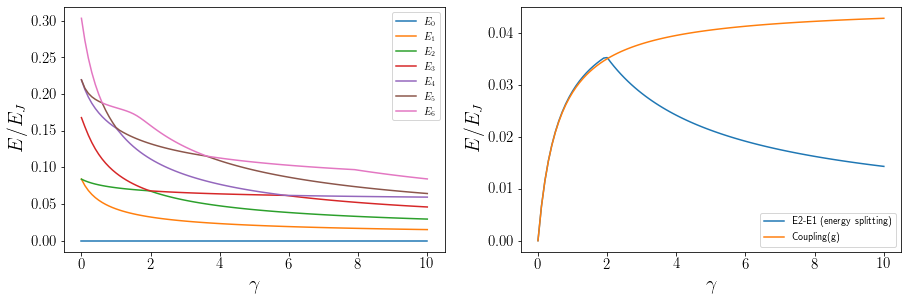

In [33]:
#Plot the result for the energy of then system and the comparision between the level splitting and the strength of the coupling.
fig, (ax1,ax2)=plt.subplots(ncols=2, nrows=1, figsize=(15, 4.5))
ax1.plot(γ, E-E[:,[0]*7], label='Inline label')
ax1.legend(('$E_0$', '$E_1$','$E_2$','$E_3$','$E_4$','$E_5$', '$E_6$'))
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$E/E_J$')
ax2.plot(γ, E[:,2]-E[:,1], γ, 2*np.abs(P[1,1,:]), label='Inline  label')
ax2.legend(('E2-E1 (energy splitting)', 'Coupling(g)'))
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$E/E_J$')

No handles with labels found to put in legend.


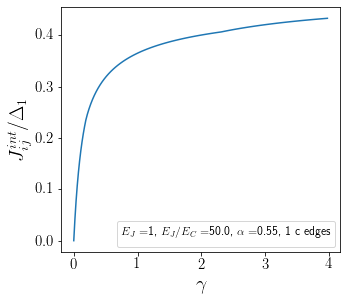

In [34]:
xpinta = give_x(γ[0:ilin],np.abs(P[0,3,0:ilin])*2,E[0:ilin,4]-E[0:ilin,0], alpha = alpha)
ypinta = np.abs(P[1,1,0:ilin]/(P[0,3,0:ilin]*2))

#Coupling/gap as a function of anisotropy
fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
ax3.plot(xpinta,ypinta)
ax3.legend(title="$ E_J=$"+str(EJ)+", $ E_J/E_C=$"+str(EJ/EC)+", $\\alpha=$"+str(alpha)+", 1 c edges", title_fontsize=12)
# ax1.legend(fontsize=14, title="$ E_J/E_C=$"+str(Ej)+", $\\)
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')

gdg[4] = ypinta
x_gdg[4] = xpinta
par[4] = [EJ,EC,alpha]
anhar[4] = [γ[0:ilin],(E[0:ilin,4]-E[0:ilin,0])/np.abs(P[0,3,0:ilin]*2)]

In [35]:
#Parameters.
alpha=0.55
EJ=1
EC=1/80
nmax=10
st=2

#Charge results.
γ, E, P = txt_to_npz_3JJ(EJ, EC, alpha, st, nmax)

E=np.real_if_close(E,10)
P=np.real_if_close(np.round(P,10),10)
γ=np.real_if_close(γ)

Text(0, 0.5, '$J_{ij}^{int}/\\Delta_1$')

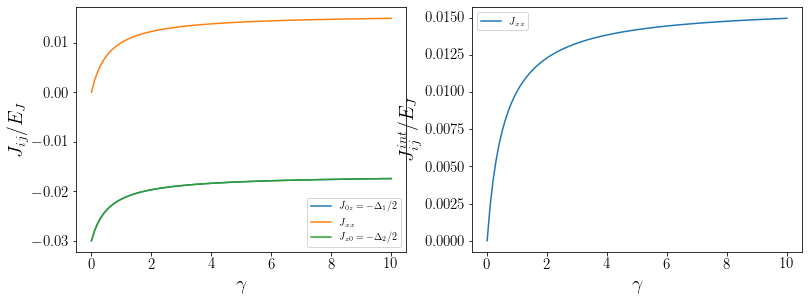

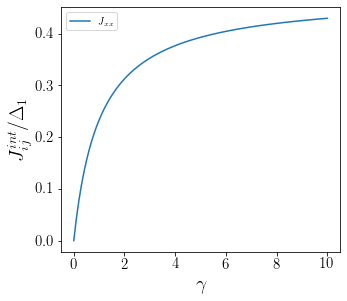

In [36]:
# Plot the results for the qubit Hamiltonian, showing the strength of the coupling.
fig,(ax1, ax2) =plt.subplots(ncols=2, nrows=1,figsize=(13, 4.5))
labels = [['$J_{00}$', '$J_{0x}$','$J_{0y}=-\epsilon_1/2$','$J_{0z}=-\Delta_1/2$'],['$J_{x0}$', '$J_{xx}$','$J_{xy}$','$J_{xz}$'],['$J_{y0}=-\epsilon_2/2$', '$J_{yx}$','$J_{yy}$','$J_{yz}$'], ['$J_{z0}=-\Delta_2/2$', '$J_{zx}$','$J_{zy}$','$J_{zz}$']] # useful to print the legend.
for l in range(4):
    for n in range(4):
        if n!=0 or l!=0:
            if np.any(P[l,n,:]!=0):
                label=labels[l][n]
                ax1.plot(γ,P[l,n,:],label = label)

ax1.legend()
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$J_{ij}/E_J$')

for k in range(1,4):
    if np.any(P[k,k,:]!=0):
        label=labels[k][k]
        ax2.plot(γ,P[k,k,:],label = label)
ax2.legend()
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$J_{ij}^{int}/E_J$')

#Ratio interaction-qubit GAP.
fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
for m in range(1,4):
    if np.any(P[m,m,:]!=0):
        label=labels[m][m]
        ax3.plot(γ,np.abs(P[m,m,:]/(P[0,3,:]*2)),label = label)
ax3.legend()
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')

Text(0, 0.5, '$E/E_J$')

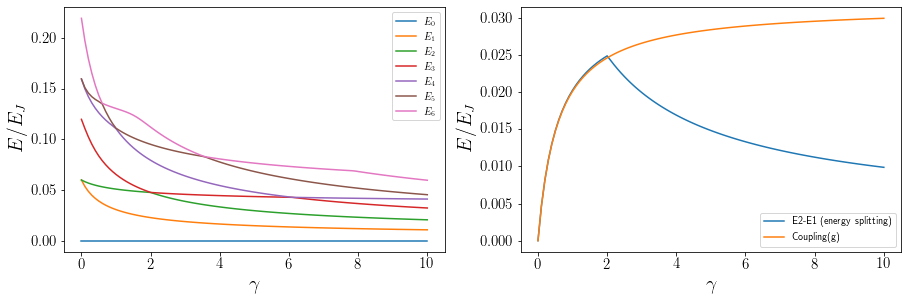

In [37]:
#Plot the result for the energy of then system and the comparision between the level splitting and the strength of the coupling.
fig, (ax1,ax2)=plt.subplots(ncols=2, nrows=1, figsize=(15, 4.5))
ax1.plot(γ, E-E[:,[0]*7], label='Inline label')
ax1.legend(('$E_0$', '$E_1$','$E_2$','$E_3$','$E_4$','$E_5$', '$E_6$'))
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$E/E_J$')
ax2.plot(γ, E[:,2]-E[:,1], γ, 2*np.abs(P[1,1,:]), label='Inline  label')
ax2.legend(('E2-E1 (energy splitting)', 'Coupling(g)'))
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$E/E_J$')

No handles with labels found to put in legend.


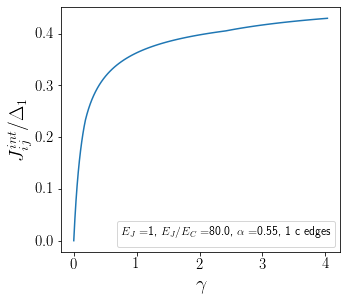

In [38]:
xpinta = give_x(γ[0:ilin],np.abs(P[0,3,0:ilin])*2,E[0:ilin,4]-E[0:ilin,0], alpha = alpha)
ypinta = np.abs(P[1,1,0:ilin]/(P[0,3,0:ilin]*2))

#Coupling/gap as a function of anisotropy
fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
ax3.plot(xpinta,ypinta)
ax3.legend(title="$ E_J=$"+str(EJ)+", $ E_J/E_C=$"+str(EJ/EC)+", $\\alpha=$"+str(alpha)+", 1 c edges", title_fontsize=12)
# ax1.legend(fontsize=14, title="$ E_J/E_C=$"+str(Ej)+", $\\)
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')

gdg[5] = ypinta
x_gdg[5] = xpinta
par[5] = [EJ,EC,alpha]
anhar[5] =  [γ[0:ilin],(E[0:ilin,4]-E[0:ilin,0])/np.abs(P[0,3,0:ilin]*2)]

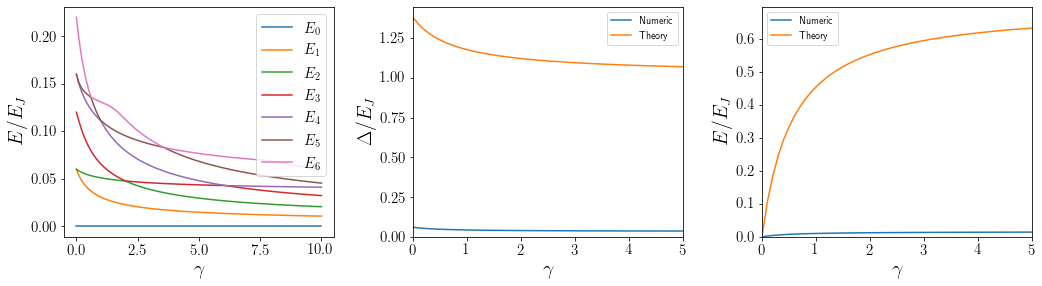

In [39]:
xx = np.linspace(0.,10,100)
yh = np.array([ggaph(alpha, x, EJ, EC) for x in xx]) 
ygh = np.array([gcoup(alpha, x, EJ, EC) for x in xx]) 
# Comparation of numerical and theoretical results:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3, nrows=1, figsize=(15, 4.5))

ax1.plot(γ, E-E[:,[0]*7], label='Inline label')
ax1.legend(('$E_0$', '$E_1$','$E_2$','$E_3$','$E_4$','$E_5$', '$E_6$'),fontsize=15)
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$E/E_J$')

# --------------------

ax2.plot(γ,  2*np.abs(P[0,3,:]), xx, yh/EJ)
ax2.legend(('Numeric','Theory' ))
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$\Delta/E_J$')
ax2.set_ylim(ymin=0)
ax2.set_xlim(xmin=0, xmax= 5)
# -----------------------------

ax3.plot(γ,P[1,1,:], xx, ygh )
ax3.legend(('Numeric', 'Theory'))
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$E/E_J$')
ax3.set_ylim(ymin=0)
ax3.set_xlim(xmin=0,xmax=5)

fig.tight_layout(pad=2.0)

# Shunted capacitors:

Names for shunted flux qubits follow the name convention r50.0alpha0.55beta3.0st5nmax5.dat. The st marks the model

st=5 ground below the small juntions. 

In [40]:
## Define a function to extract the data from the txt. 
def txt_to_npz_shunted(EJ, EC, alpha, beta, st, nmax):
    lines = []                             # Declare an empty list to store lines.
    with open ('r'+str(EJ/EC)+'alpha'+str(alpha)+'beta'+str(beta)+'st'+str(st)+'nmax'+str(nmax)+'.dat', 'rt') as txt: # Open .txt for reading text data.
        for line in txt:                # For each line, stored as line.
            lines.append(line)
    
    #Extract the data from lines.
    gamma=lines[1].split() #remember that the first line are the coments so gamma=second line.
    for i in range(len(gamma)): 
        gamma[i]=complex(gamma[i])
    E=np.zeros((len(gamma),7),dtype=complex) #Matrix to store the energies values.
    for j in range(7):
        E_aux= lines[j+2].split() #rows from 2 to 8 give the energies.
        for i in range(len(E_aux)):
            E_aux[i]=complex(E_aux[i])
        E[:,j]=E_aux
        
    P=np.zeros((4,4,len(gamma)),dtype=complex) #Matrix to store the P_ij values.
    P_aux=lines[9].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[0,0]=P_aux
    
    P_aux=lines[10].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[1,1]=P_aux
    
    P_aux=lines[11].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[2,2]=P_aux
    
    P_aux=lines[12].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[3,3]=P_aux
    
    P_aux=lines[13].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[0,1]=P_aux
    
    P_aux=lines[14].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[1,0]=P_aux
    
    P_aux=lines[15].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[0,2]=P_aux
    
    P_aux=lines[16].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[2,0]=P_aux
    
    P_aux=lines[17].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[0,3]=P_aux
    
    P_aux=lines[18].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[3,0]=P_aux
    
    P_aux=lines[19].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[1,2]=P_aux
    
    P_aux=lines[20].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[2,1]=P_aux
    
    P_aux=lines[21].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[1,3]=P_aux
    
    P_aux=lines[22].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[3,1]=P_aux
    
    P_aux=lines[23].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[2,3]=P_aux
    
    P_aux=lines[24].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[3,2]=P_aux
    
    return gamma, E, P

In [41]:

#Parameters.
alpha=0.55
EJ=1
EC=1/50
beta = 3.0
nmax=5
st=5

#Charge results.
γ, E, P = txt_to_npz_shunted(EJ, EC, alpha, beta, st, nmax)

E=np.real_if_close(E,10)
P=np.real_if_close(np.round(P,10),10)
γ=np.real_if_close(γ)

Text(0, 0.5, '$J_{ij}^{int}/\\Delta_1$')

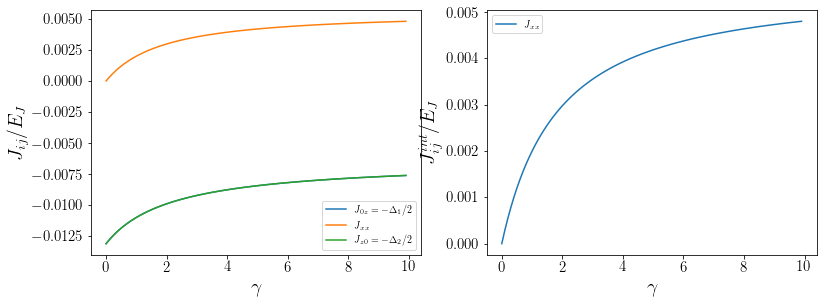

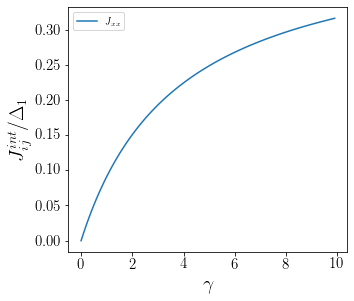

In [42]:
# Plot the results for the qubit Hamiltonian, showing the strength of the coupling.
fig,(ax1, ax2) =plt.subplots(ncols=2, nrows=1,figsize=(13, 4.5))
labels = [['$J_{00}$', '$J_{0x}$','$J_{0y}=-\epsilon_1/2$','$J_{0z}=-\Delta_1/2$'],['$J_{x0}$', '$J_{xx}$','$J_{xy}$','$J_{xz}$'],['$J_{y0}=-\epsilon_2/2$', '$J_{yx}$','$J_{yy}$','$J_{yz}$'], ['$J_{z0}=-\Delta_2/2$', '$J_{zx}$','$J_{zy}$','$J_{zz}$']] # useful to print the legend.
for l in range(4):
    for n in range(4):
        if n!=0 or l!=0:
            if np.any(P[l,n,:]!=0):
                label=labels[l][n]
                ax1.plot(γ,P[l,n,:],label = label)

ax1.legend()
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$J_{ij}/E_J$')

for k in range(1,4):
    if np.any(P[k,k,:]!=0):
        label=labels[k][k]
        ax2.plot(γ,P[k,k,:],label = label)
ax2.legend()
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$J_{ij}^{int}/E_J$')

#Ratio interaction-qubit GAP.
fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
for m in range(1,4):
    if np.any(P[m,m,:]!=0):
        label=labels[m][m]
        ax3.plot(γ,np.abs(P[m,m,:]/(P[0,3,:]*2)),label = label)
ax3.legend()
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')

Text(0, 0.5, '$E/E_J$')

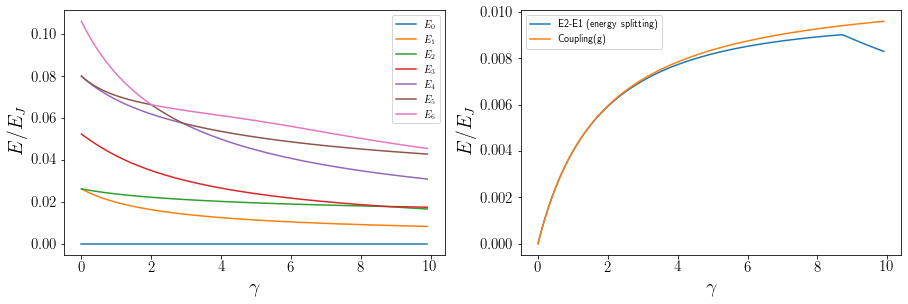

In [43]:
#Plot the result for the energy of then system and the comparision between the level splitting and the strength of the coupling.
fig, (ax1,ax2)=plt.subplots(ncols=2, nrows=1, figsize=(15, 4.5))
ax1.plot(γ, E-E[:,[0]*7], label='Inline label')
ax1.legend(('$E_0$', '$E_1$','$E_2$','$E_3$','$E_4$','$E_5$', '$E_6$'))
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$E/E_J$')
ax2.plot(γ, E[:,2]-E[:,1], γ, 2*np.abs(P[1,1,:]), label='Inline  label')
ax2.legend(('E2-E1 (energy splitting)', 'Coupling(g)'))
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$E/E_J$')

No handles with labels found to put in legend.


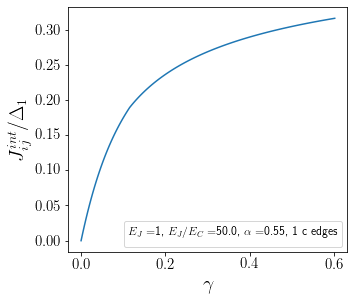

In [44]:
xpinta = give_x(γ[0:ilin],np.abs(P[0,3,0:ilin])*2,E[0:ilin,4]-E[0:ilin,0], beta = beta, alpha = alpha)
ypinta = np.abs(P[1,1,0:ilin]/(P[0,3,0:ilin]*2))

#Coupling/gap as a function of anisotropy
fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
ax3.plot(xpinta,ypinta)
ax3.legend(title="$ E_J=$"+str(EJ)+", $ E_J/E_C=$"+str(EJ/EC)+", $\\alpha=$"+str(alpha)+", 1 c edges", title_fontsize=12)
# ax1.legend(fontsize=14, title="$ E_J/E_C=$"+str(Ej)+", $\\)
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')

gdg[6] = ypinta
x_gdg[6] = xpinta
par[6] = [EJ,EC,alpha, beta]
anhar[6] = [γ[0:ilin],(E[0:ilin,4]-E[0:ilin,0])/np.abs(P[0,3,0:ilin]*2)]

In [45]:
#Parameters.
alpha=0.55
EJ=1
EC=1/50
beta = 0.5
nmax=5
st=5

#Charge results.
γ, E, P = txt_to_npz_shunted(EJ, EC, alpha, beta, st, nmax)

E=np.real_if_close(E,10)
P=np.real_if_close(np.round(P,10),10)
γ=np.real_if_close(γ)

Text(0, 0.5, '$J_{ij}^{int}/\\Delta_1$')

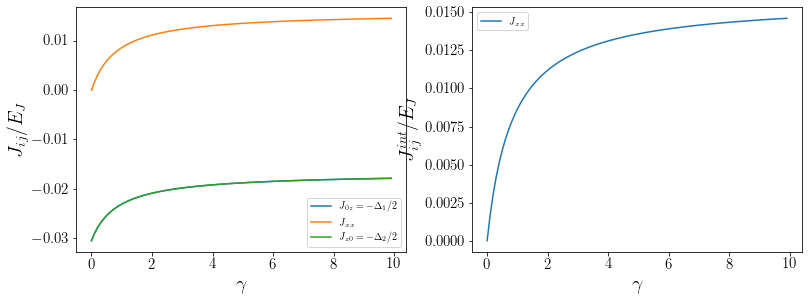

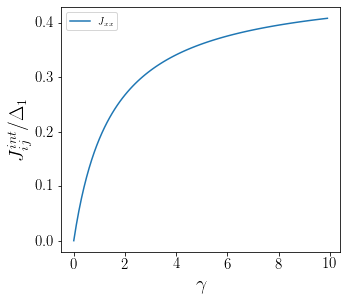

In [46]:
# Plot the results for the qubit Hamiltonian, showing the strength of the coupling.
fig,(ax1, ax2) =plt.subplots(ncols=2, nrows=1,figsize=(13, 4.5))
labels = [['$J_{00}$', '$J_{0x}$','$J_{0y}=-\epsilon_1/2$','$J_{0z}=-\Delta_1/2$'],['$J_{x0}$', '$J_{xx}$','$J_{xy}$','$J_{xz}$'],['$J_{y0}=-\epsilon_2/2$', '$J_{yx}$','$J_{yy}$','$J_{yz}$'], ['$J_{z0}=-\Delta_2/2$', '$J_{zx}$','$J_{zy}$','$J_{zz}$']] # useful to print the legend.
for l in range(4):
    for n in range(4):
        if n!=0 or l!=0:
            if np.any(P[l,n,:]!=0):
                label=labels[l][n]
                ax1.plot(γ,P[l,n,:],label = label)

ax1.legend()
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$J_{ij}/E_J$')

for k in range(1,4):
    if np.any(P[k,k,:]!=0):
        label=labels[k][k]
        ax2.plot(γ,P[k,k,:],label = label)
ax2.legend()
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$J_{ij}^{int}/E_J$')

#Ratio interaction-qubit GAP.
fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
for m in range(1,4):
    if np.any(P[m,m,:]!=0):
        label=labels[m][m]
        ax3.plot(γ,np.abs(P[m,m,:]/(P[0,3,:]*2)),label = label)
ax3.legend()
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')

Text(0, 0.5, '$E/E_J$')

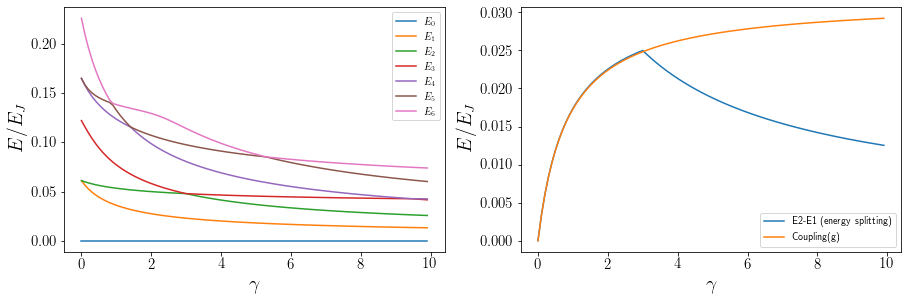

In [47]:
#Plot the result for the energy of then system and the comparision between the level splitting and the strength of the coupling.
fig, (ax1,ax2)=plt.subplots(ncols=2, nrows=1, figsize=(15, 4.5))
ax1.plot(γ, E-E[:,[0]*7], label='Inline label')
ax1.legend(('$E_0$', '$E_1$','$E_2$','$E_3$','$E_4$','$E_5$', '$E_6$'))
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$E/E_J$')
ax2.plot(γ, E[:,2]-E[:,1], γ, 2*np.abs(P[1,1,:]), label='Inline  label')
ax2.legend(('E2-E1 (energy splitting)', 'Coupling(g)'))
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$E/E_J$')

In [48]:
# Annarmonicity

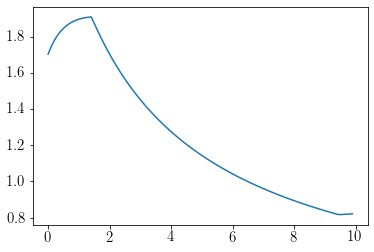

In [49]:
#Plot the result for the energy of then system and the comparision between the level splitting and the strength of the coupling.
fig, (ax1)=plt.subplots()
ax1.plot(γ, (E[:,4]-E[:,1])/(-P[0,3,:]*2), label='Inline label')


No handles with labels found to put in legend.


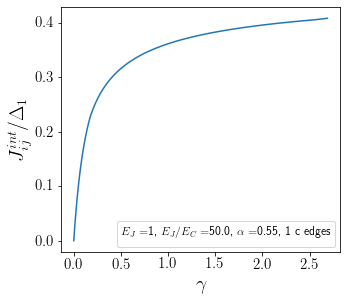

In [50]:
xpinta = give_x(γ[0:ilin],np.abs(P[0,3,0:ilin])*2,E[0:ilin,4]-E[0:ilin,0], beta = beta, alpha = alpha)
ypinta = np.abs(P[1,1,0:ilin]/(P[0,3,0:ilin]*2))

#Coupling/gap as a function of anisotropy
fig,(ax3) =plt.subplots(ncols=1, nrows=1,figsize=(5, 4.5))
ax3.plot(xpinta,ypinta)
ax3.legend(title="$ E_J=$"+str(EJ)+", $ E_J/E_C=$"+str(EJ/EC)+", $\\alpha=$"+str(alpha)+", 1 c edges", title_fontsize=12)
# ax1.legend(fontsize=14, title="$ E_J/E_C=$"+str(Ej)+", $\\)
ax3.set_xlabel('$\gamma$')
ax3.set_ylabel('$J_{ij}^{int}/\Delta_1$')

gdg[7] = ypinta
x_gdg[7] = xpinta
par[7] = [EJ,EC,alpha, beta]
anhar[7] = [γ[0:ilin],(E[0:ilin,4]-E[0:ilin,0])/np.abs(P[0,3,0:ilin]*2)]

# Papers Fig 4: Scale all data

In [ ]:
import math 
fig,(ax,ax1) =plt.subplots(ncols=2, nrows=1,figsize=(10, 4.5),constrained_layout=True)
for (a, b, c, d) in zip(x_gdg, gdg, par, anhar):
    if c:
        if len(c)==3:
            ax.plot(a,b,  label="$E_j/E_c=$"+str(c[0]/c[1])+"$, \\alpha=$"+str(c[2]))
            ax1.plot(a,d[1],  label="$E_j/E_c=$"+str(c[0]/c[1])+"$, \\alpha=$"+str(c[2]))
        else:
            ax.plot(a,b,  label="$E_j/E_c=$"+str(c[0]/c[1])+"$, \\alpha=$"+str(c[2])+"$, \\beta=$"+str(c[3]))
            ax1.plot(a,d[1],  label="$E_j/E_c=$"+str(c[0]/c[1])+"$, \\alpha=$"+str(c[2])+"$, \\beta=$"+str(c[3]))

ax.set_title('(a)',fontsize= 22)
ax.set_xlim([0,2.5])
ax.set_ylim([0,0.45])
ax.legend(fontsize=13)
ax.set_xlabel('$\\frac{\gamma}{\Delta_a *c_{eff}}$', fontsize = 23)
ax.set_ylabel('$g/\Delta$')


ax1.set_title('(b)',fontsize= 22)
ax1.set_xlim([0,2.5])
ax1.set_yticks(range(1, 17,2))
ax1.set_ylim([1,17])
ax1.set_xlabel('$\\frac{\gamma}{\Delta_a *c_{eff}}$', fontsize = 23)
ax1.set_ylabel('$\Delta_a$')
ax1.legend(fontsize=13)

plt.savefig('Fig4.pdf')

